In [2]:
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
data = pd.read_csv('/Users/tongge/Desktop/Course ISU/CE_650C Advanced topic transportation/Lecture9-master 2/Assignment/VSL_Data1.csv')
data.head(5)

,Time,Speed,Occu,Label
0,14420,59.030245,1.5,70 MPH
1,14440,59.030245,2.0,70 MPH
2,14460,55.302019,2.0,70 MPH
3,14480,65.243955,1.5,70 MPH
4,14560,64.622584,2.5,70 MPH


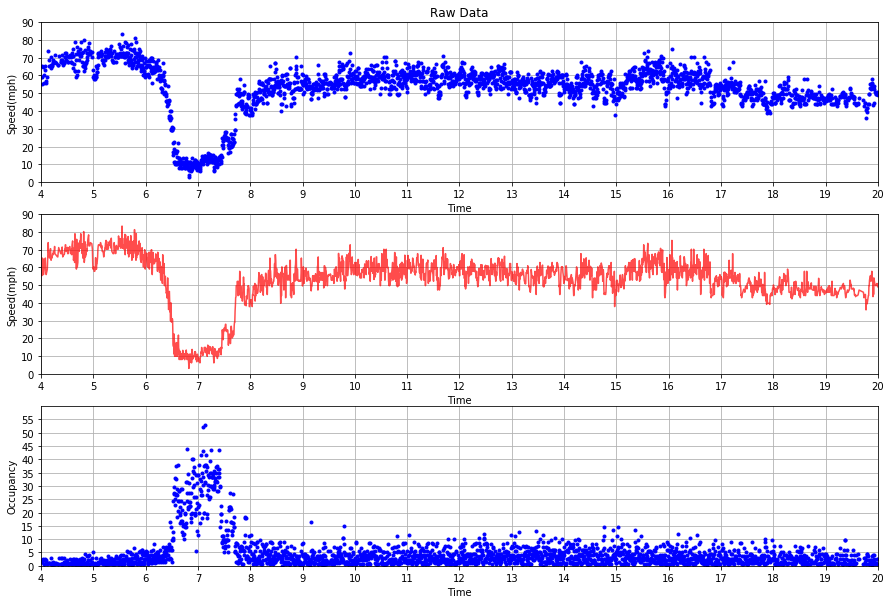

In [4]:
from ipywidgets import interact, interactive, fixed
from matplotlib import gridspec
fig= plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(3, 1, wspace=0.1, hspace=0.2)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])


yrange = [20,90]
ytick = range(0, 100, 10)
xrange = [4,20]
xtick = range(4, 21, 1)

#read data
speed = data['Speed']
time = data['Time']/3600
Occu = data['Occu']

ax0.plot(time, speed, '.', color = 'b')
ax0.set_xlabel('Time')
ax0.set_ylabel('Speed(mph)')
ax0.set_xlim(xrange)
ax0.set_xticks(xtick)
ax0.set_ylim(yrange)
ax0.set_yticks(ytick)
ax0.set_title('Raw Data')
ax0.grid(True)

ax1.plot(time, speed, alpha = 0.7,color='red')
ax1.set_xlabel('Time')
ax1.set_ylabel('Speed(mph)')
ax1.set_xlim(xrange)
ax1.set_xticks(xtick)
ax1.set_ylim(yrange)
ax1.set_yticks(ytick)
ax1.grid(True)

ax2.plot(time, Occu, '.', color = 'b')
ax2.set_xlabel('Time')
ax2.set_ylabel('Occupancy')
ax2.set_xlim(xrange)
ax2.set_xticks(xtick)
ax2.set_ylim([0,60])
ax2.set_yticks(range(0, 60, 5))
ax2.grid(True)

/usr/local/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


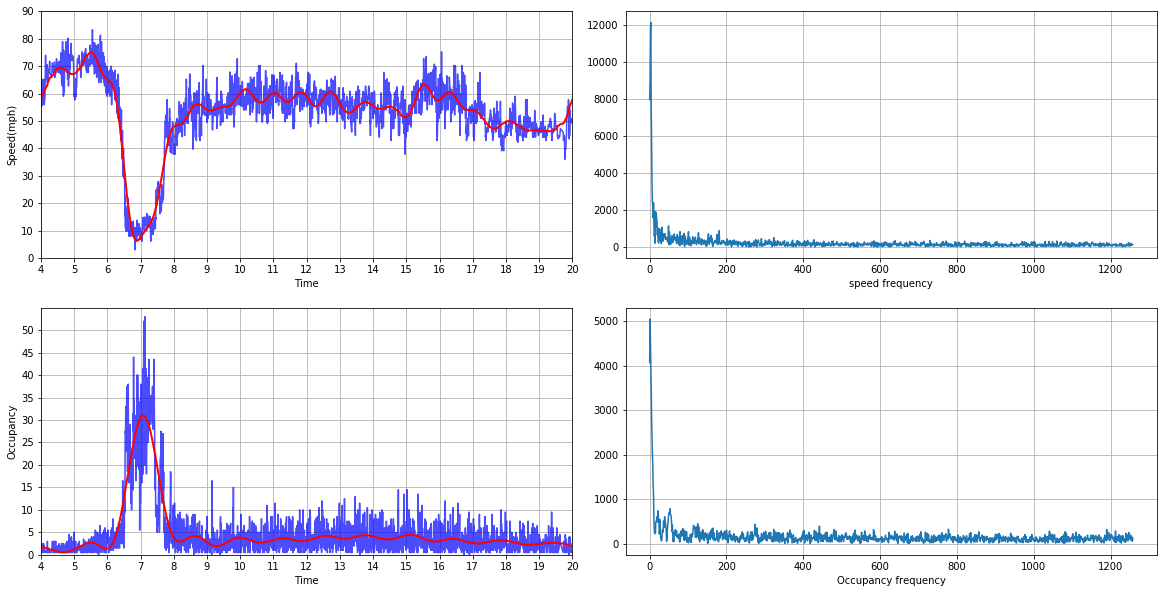

In [9]:
# Plot
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(2, 2, wspace=0.1, hspace=0.2)
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[1,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,1])
# set label
yrange = [0,90]
ytick = range(0, 100, 10)
xrange = [4,20]
xtick = range(4, 21, 1)

speed = data['Speed']
time = data['Time']/3600
Occu = data['Occu']

## Speed
# FFT
speedFFT = np.fft.fft(speed)
ax2.plot(abs(speedFFT[1:len(speedFFT)//2]))
ax2.grid(True)
ax2.set_xlabel('speed frequency')
# denoise
threshold = 1500
mask = abs(speedFFT) > threshold
speed_DEnoise_FFT = speedFFT * mask
speed_DEnoise_iFFT = np.fft.ifft(speed_DEnoise_FFT)
# subplot-speed
ax0.plot(time, speed, alpha = 0.7, color = 'blue')
ax0.plot(time, speed_DEnoise_iFFT, linewidth=2.0, color = 'red')
ax0.set_xlabel('Time')
ax0.set_ylabel('Speed(mph)')
ax0.set_xlim(xrange)
ax0.set_xticks(xtick)
ax0.set_ylim(yrange)
ax0.set_yticks(ytick)
ax0.grid(True)

## Occupancy
# FFT
OccuFFT = np.fft.fft(Occu)
ax3.plot(abs(OccuFFT[1:len(OccuFFT)//2]))
ax3.grid(True)
ax3.set_xlabel('Occupancy frequency')
# denoise
threshold = 800
mask = abs(OccuFFT) > threshold
Occu_DEnoise_FFT = OccuFFT * mask
Occu_DEnoise_iFFT = np.fft.ifft(Occu_DEnoise_FFT)
# subplot-Occu
ax1.plot(time, Occu, alpha = 0.7, color= 'blue')
ax1.plot(time, Occu_DEnoise_iFFT, linewidth=2.0, color = 'red')
ax1.set_xlabel('Time')
ax1.set_ylabel('Occupancy')
ax1.set_xlim(xrange)
ax1.set_xticks(xtick)
ax1.set_ylim([0,55])
ax1.set_yticks(range(0, 55, 5))
ax1.grid(True)

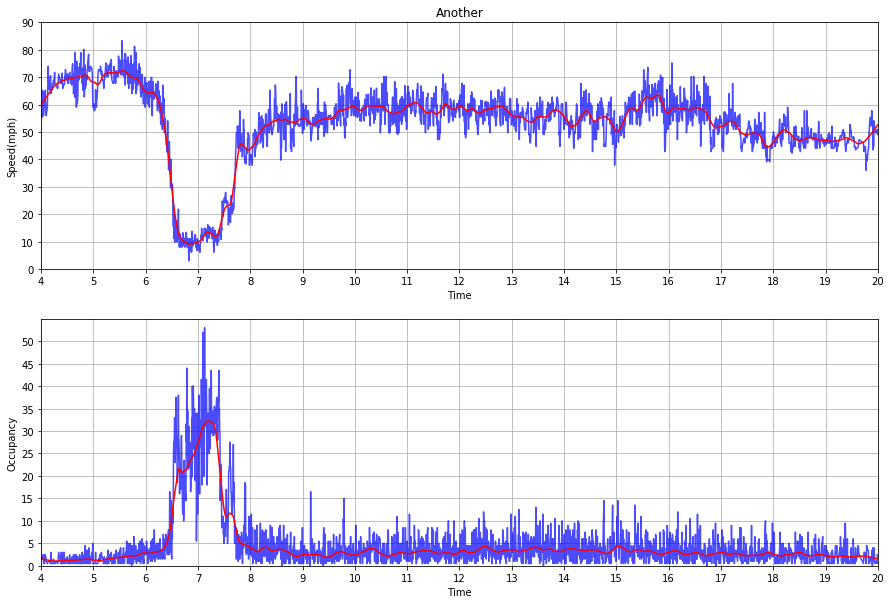

In [382]:
import statsmodels.api as sm
# plot 
fig = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(2, 1, wspace=0.1, hspace=0.2)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
# lowess
lowess_speed = sm.nonparametric.lowess(speed, time, frac=0.02)
lowess_Occu = sm.nonparametric.lowess(Occu, time, frac=0.02)
# subplot1 speed
yrange = [20,90]
ytick = range(0, 100, 10)
xrange = [4,20]
xtick = range(4, 21, 1)
ax0.plot(time, speed, alpha = 0.7, color = 'blue')
ax0.plot(lowess_speed[:, 0], lowess_speed[:, 1], color = 'red')
ax0.set_xlabel('Time')
ax0.set_ylabel('Speed(mph)')
ax0.set_xlim(xrange)
ax0.set_xticks(xtick)
ax0.set_ylim(yrange)
ax0.set_yticks(ytick)
ax0.set_title('Another')
ax0.grid(True)
# subplot2_Occu
ax1.plot(time, Occu, alpha = 0.7, color= 'blue')
ax1.plot(lowess_Occu[:, 0], lowess_Occu[:, 1], color = 'red')
ax1.set_xlabel('Time')
ax1.set_ylabel('Occupancy')
ax1.set_xlim(xrange)
ax1.set_xticks(xtick)
ax1.set_ylim([0,55])
ax1.set_yticks(range(0, 55, 5))
ax1.grid(True)

/Users/tongge/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


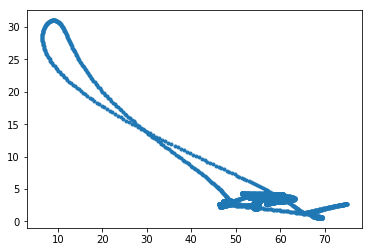

In [415]:
plt.plot(speed_DEnoise_iFFT,Occu_DEnoise_iFFT,'.')

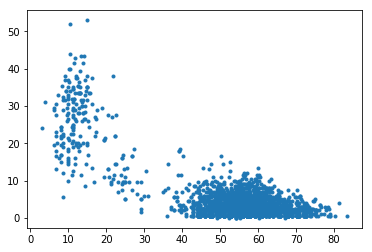

In [392]:
plt.plot(speed,Occu,'.')

In [394]:
lowess_speed

array([[  4.00555556,  59.85026366],
       [  4.01111111,  60.01953228],
       [  4.01666667,  60.18814632],
       ..., 
       [ 19.98333333,  52.26466632],
       [ 19.98888889,  52.40988094],
       [ 19.99444444,  52.55471746]])

In [398]:
lowess_speed = sm.nonparametric.lowess(speed, time, frac=0.02)

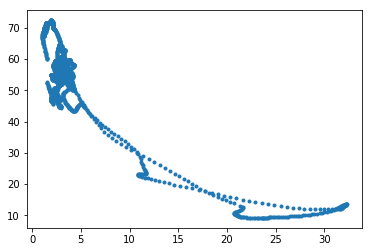

In [410]:
plt.plot(lowess_Occu[:,1],lowess_speed[:,1],'.')

In [544]:
lowess_speed = sm.nonparametric.lowess(speed, time, frac=0.02)
lowess_Occu = sm.nonparametric.lowess(Occu, time, frac=0.02)
lowess_speed[:,0]=lowess_Occu[:,1]
np.savetxt('/Users/tongge/Desktop/CE650C/Lecture9-master 2/Assignment/VSL_Another.csv', lowess_speed, delimiter=',')

In [664]:
from numpy import array, dtype
Occu_DEnoise_iFFT = Occu_DEnoise_iFFT.astype(dtype("float"))
speed_DEnoise_iFFT = speed_DEnoise_iFFT.astype(dtype("float"))
c = np.vstack((Occu_DEnoise_iFFT,speed_DEnoise_iFFT))
np.savetxt('/Users/tongge/Desktop/CE650C/Lecture9-master 2/Assignment/Try.csv', c, delimiter=',')

/Users/tongge/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


In [20]:
## Classfication, prediction
# data read
data1 = pd.read_excel('/Users/tongge/Desktop/CE650C/Lecture9-master 2/Assignment/Workbook2.xlsx')
data2 = pd.read_csv('/Users/tongge/Desktop/CE650C/Lecture9-master 2/Assignment/VSL_FFt.csv')
data3 = pd.read_csv('/Users/tongge/Desktop/CE650C/Lecture9-master 2/Assignment/VSL_Another.csv')
datatest = pd.read_csv('/Users/tongge/Desktop/CE650C/Lecture9-master 2/Assignment/VSL_Data2.csv')
speedRaw = data1['Speed']
OccuRaw =  data1['Occu']
labelRaw = data1['Label']
speedFFT = data2['Speed']
OccuFFT =  data2['Occu']
labelFFT = data2['Label']
speedAno = data3['Speed']
OccuAno =  data3['Occu']
labelAno = data3['Label']
speedtest = datatest['Speed']
Occutest =  datatest['Occu']
labeltest = datatest['Label']

In [86]:
# split train and test 
X = np.asarray([[gg, ss] for gg, ss in zip(speedAno, OccuAno)])
y = np.asarray(labelAno)
split = int(0.7*len(labelAno))
X_train = X[0:split]
y_train = y[0:split]
X_test = X[split:]
y_test = y[split:]

In [87]:
# split train and test 
speed_train1 = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==35]
occup_train1 = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==35]
speed_train2 = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==45]
occup_train2 = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==45]
speed_train3 = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==55]
occup_train3 = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==55]
speed_train4 = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==70]
occup_train4 = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==70]

speed_test1 = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==35]
occup_test1 = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==35]
speed_test2 = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==45]
occup_test2 = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==45]
speed_test3 = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==55]
occup_test3 = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==55]
speed_test4 = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==70]
occup_test4 = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==70]

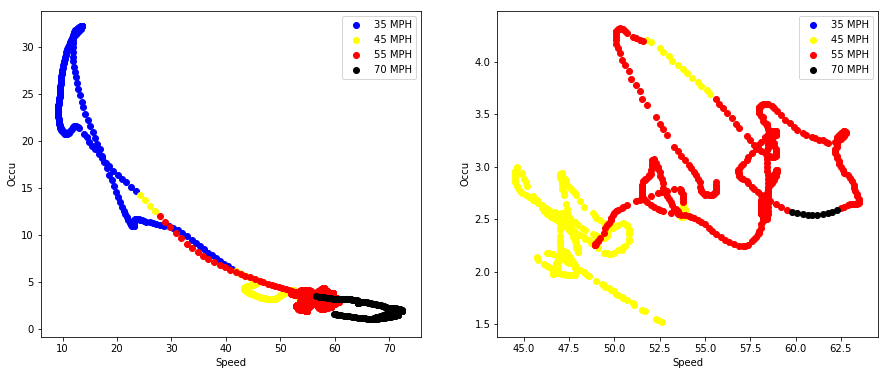

In [88]:
#data visualization
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.scatter(speed_train1, occup_train1, color = "blue", label="35 MPH")
plt.scatter(speed_train2, occup_train2, color = "yellow", label="45 MPH")
plt.scatter(speed_train3, occup_train3, color = "red", label="55 MPH")
plt.scatter(speed_train4, occup_train4, color = "black", label="70 MPH")
plt.legend()
plt.xlabel("Speed")
plt.ylabel("Occu")

plt.subplot(1,2,2)
plt.scatter(speed_test1, occup_test1, color = "blue", label="35 MPH")
plt.scatter(speed_test2, occup_test2, color = "yellow", label="45 MPH")
plt.scatter(speed_test3, occup_test3, color = "red", label="55 MPH")
plt.scatter(speed_test4, occup_test4, color = "black", label="70 MPH")
plt.legend()
plt.xlabel("Speed")
plt.ylabel("Occu")

In [89]:
#SVM
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import datasets, svm, metrics

clf =  svm.SVC(C=0.1)
clf.fit(X_train, y_train)

pred = clf.predict(X_train)
acc = accuracy_score(pred, y_train)
print("train accuracy = ",acc)

pred = clf.predict(X_test)
acc = accuracy_score(pred, y_test)
print("test accuracy = ",acc)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].


train accuracy =  0.946712018141
test accuracy =  0.664464993395


train accuracy =  0.842403628118
test accuracy =  0.525759577279


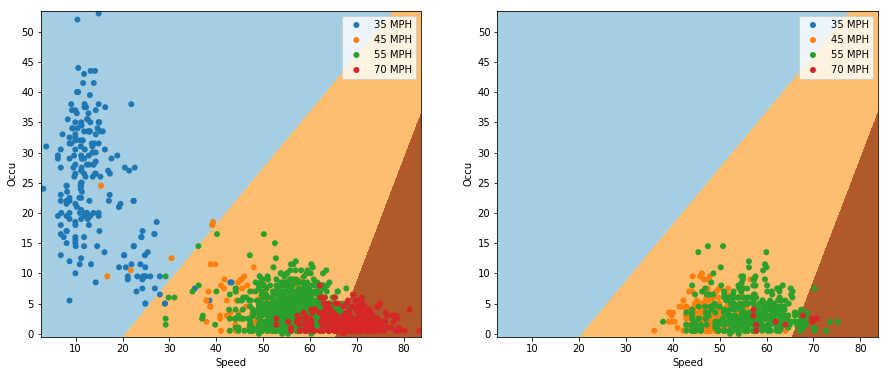

In [65]:
# logistic Regression
import warnings
warnings.filterwarnings("ignore")
import matplotlib 
%matplotlib inline
import pylab as pl
from ipywidgets import interact, interactive, fixed
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.metrics import accuracy_score
#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

h = .02  # step size in the mesh
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

        
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(speed_train1, occup_train1, edgecolors='', cmap=plt.cm.Paired, label="35 MPH")
plt.scatter(speed_train2, occup_train2, edgecolors='', cmap=plt.cm.Paired, label="45 MPH")
plt.scatter(speed_train3, occup_train3, edgecolors='', cmap=plt.cm.Paired, label="55 MPH")
plt.scatter(speed_train4, occup_train4, edgecolors='', cmap=plt.cm.Paired, label="70 MPH")
plt.xlabel('Speed')
plt.ylabel('Occu')
plt.legend()
plt.xticks(range(0, 100, 10))
plt.yticks(range(0, 60, 5))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.subplot(1,2,2)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(speed_test1, occup_test1, edgecolors='', cmap=plt.cm.Paired, label="35 MPH")
plt.scatter(speed_test2, occup_test2, edgecolors='', cmap=plt.cm.Paired, label="45 MPH")
plt.scatter(speed_test3, occup_test3, edgecolors='', cmap=plt.cm.Paired, label="55 MPH")
plt.scatter(speed_test4, occup_test4, edgecolors='', cmap=plt.cm.Paired, label="70 MPH")
plt.xlabel('Speed')
plt.ylabel('Occu')
plt.legend()
plt.xticks(range(0, 100, 10))
plt.yticks(range(0, 60, 5))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# plt.subplot(1,2,2)
# plt.scatter(X_test[:,0], X_test[:,1], color = "black")
    
pred = clf.predict(X_train)
acc = accuracy_score(pred, y_train)
print("train accuracy = ",acc)
pred = clf.predict(X_test)
acc = accuracy_score(pred, y_test)
print("test accuracy = ",acc)

In [4]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
from ipywidgets import interact, interactive, fixed
#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

def prettyPicture(clf, X_train, y_train):
    #x_min = 0.0; x_max = 1.0
    #y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    # xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the train points
    speed_sig1 = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==35]
    occup_sig1 = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==35]
    speed_sig2 = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==45]
    occup_sig2 = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==45]
    speed_sig3 = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==55]
    occup_sig3 = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==55]
    speed_sig4 = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==70]
    occup_sig4 = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==70]

    plt.scatter(speed_sig1, occup_sig1, color = "blue", label="35 MPH")
    plt.scatter(speed_sig2, occup_sig2, color = "yellow", label="45 MPH")
    plt.scatter(speed_sig3, occup_sig3, color = "red", label="55 MPH")
    plt.scatter(speed_sig4, occup_sig4, color = "black", label="70 MPH")
    plt.legend()
    plt.xlabel("Speed")
    plt.ylabel("Occu")

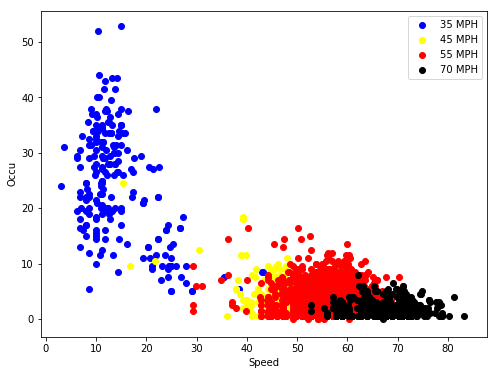

In [5]:
# data visualization
plt.figure(figsize=(8,6))
plt.scatter(speed_sig1, occup_sig1, color = "blue", label="35 MPH")
plt.scatter(speed_sig2, occup_sig2, color = "yellow", label="45 MPH")
plt.scatter(speed_sig3, occup_sig3, color = "red", label="55 MPH")
plt.scatter(speed_sig4, occup_sig4, color = "black", label="70 MPH")
plt.legend()
plt.xlabel("Speed")
plt.ylabel("Occu")

In [ ]:
# logistic
from sklearn.metrics import accuracy_score

features_train = X_train
labels_train = y_train

penalty = ['l1', 'l2']

@interact
def LR_play(C:(-1.,10.)=1., penalty:penalty='l2'):
    clf = LogisticRegression(penalty=penalty,C=1e5) #C=10**C)
    clf.fit(features_train, labels_train)
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    prettyPicture(clf, features_train, labels_train)
#    plt.subplot(1,2,2)
#    prettyPicture(clf, features_test, labels_test)
    
    pred = clf.predict(features_train)
    acc = accuracy_score(pred, labels_train)
    print("train accuracy = ",acc)
#    pred = clf.predict(features_test)
#    acc = accuracy_score(pred, labels_test)
#    print("test accuracy = ",acc)

In [ ]:
# decision tree

from sklearn import tree
from sklearn.metrics import accuracy_score

features_train = X_train
labels_train = y_train
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

@interact
def Tree_play(min_samples_split:(2,100)=2):
    clf = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)
    clf.fit(features_train, labels_train)
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    prettyPicture(clf, features_train, labels_train)
    
    pred = clf.predict(features_train)
    acc = accuracy_score(pred, labels_train)
    print("train accuracy = ",acc)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.metrics import accuracy_score

#speedRaw = speedFFT
#OccuRaw = OccuFFT
#labelRaw = labelFFT
# zip speed and Occu, create zip data
x_trainRaw = np.asarray([[gg, ss] for gg, ss in zip(speedRaw, OccuRaw)])
xTest = np.asarray([[gg, ss] for gg, ss in zip(speedtest, Occutest)])
y_trainRaw = np.asarray(labelRaw)
yTest = np.asarray(labeltest)
X_test = xTest
y_test = yTest
X = array(x_trainRaw)
y = array(y_trainRaw)
# xRaw,yRaw,xTest,yTest
speed_sig1 = [x_trainRaw[ii][0] for ii in range(0, len(x_trainRaw)) if y_trainRaw[ii]==35]
occup_sig1 = [x_trainRaw[ii][1] for ii in range(0, len(x_trainRaw)) if y_trainRaw[ii]==35]
speed_sig2 = [x_trainRaw[ii][0] for ii in range(0, len(x_trainRaw)) if y_trainRaw[ii]==45]
occup_sig2 = [x_trainRaw[ii][1] for ii in range(0, len(x_trainRaw)) if y_trainRaw[ii]==45]
speed_sig3 = [x_trainRaw[ii][0] for ii in range(0, len(x_trainRaw)) if y_trainRaw[ii]==55]
occup_sig3 = [x_trainRaw[ii][1] for ii in range(0, len(x_trainRaw)) if y_trainRaw[ii]==55]
speed_sig4 = [x_trainRaw[ii][0] for ii in range(0, len(x_trainRaw)) if y_trainRaw[ii]==70]
occup_sig4 = [x_trainRaw[ii][1] for ii in range(0, len(x_trainRaw)) if y_trainRaw[ii]==70]

NameError: name 'array' is not defined

In [19]:
# logistic Regression
import warnings
warnings.filterwarnings("ignore")

import matplotlib 
%matplotlib inline

import pylab as pl
from ipywidgets import interact, interactive, fixed
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.metrics import accuracy_score
#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

h = .02  # step size in the mesh
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X, y)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
        
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(speed_sig1,occup_sig1,edgecolors='', cmap=plt.cm.Paired, label = "35 MPH")
plt.scatter(speed_sig2,occup_sig2,edgecolors='', cmap=plt.cm.Paired, label = "45 MPH")
plt.scatter(speed_sig3,occup_sig3,edgecolors='', cmap=plt.cm.Paired, label = "55 MPH")
plt.scatter(speed_sig4,occup_sig4,edgecolors='', cmap=plt.cm.Paired, label = "70 MPH")
plt.xlabel('Speed')
plt.ylabel('Occu')
plt.legend()
plt.xticks(range(0, 100, 10))
plt.yticks(range(0, 60, 5))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# plt.subplot(1,2,2)
# plt.scatter(X_test[:,0], X_test[:,1], color = "black")
    
pred = logreg.predict(x_trainRaw)
acc = accuracy_score(pred, y_trainRaw)
print("train accuracy = ",acc)
# pred = logreg.predict(xTest)
# acc = accuracy_score(pred, yTest)
# print("test accuracy = ",acc)

NameError: name 'X' is not defined

train accuracy =  0.962316541055


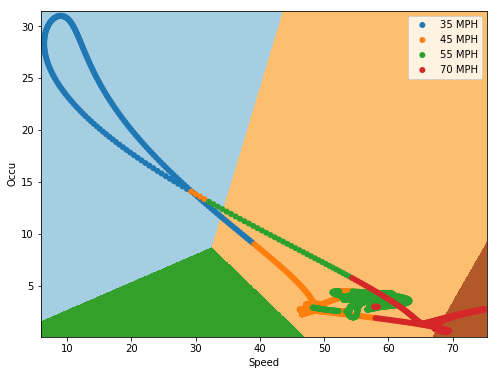

In [295]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C:(-1.,2.)=0.  ,kernel=kernel,degree=degree,gamma=10**gamma
#kernel:kernel='linear'
#gamma:(-2.,5.)=0.
#degree:(1,9)=1

h = .02  # step size in the mesh
clf =  SVC(C=10**C)
clf.fit(X, y)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# plt.subplot(1,2,1)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.figure(figsize=(8,6))



plt.scatter(speed_sig1,occup_sig1,edgecolors='', cmap=plt.cm.Paired, label = "35 MPH")
plt.scatter(speed_sig2,occup_sig2,edgecolors='', cmap=plt.cm.Paired, label = "45 MPH")
plt.scatter(speed_sig3,occup_sig3,edgecolors='', cmap=plt.cm.Paired, label = "55 MPH")
plt.scatter(speed_sig4,occup_sig4,edgecolors='', cmap=plt.cm.Paired, label = "70 MPH")
plt.xlabel('Speed')
plt.ylabel('Occu')
plt.legend()
plt.xticks(range(0, 100, 10))
plt.yticks(range(0, 60, 5))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


pred = clf.predict(x_trainRaw)
acc = accuracy_score(pred, y_trainRaw)
print("train accuracy = ",acc)

In [53]:
def makeTerrainData(n_points=len(OccuRaw)):

### make the dataset
    X = [[gg, ss] for gg, ss in zip(speedRaw, OccuRaw)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    labelRaw_train = labelRaw[0:split]
    labelRaw_test  = labelRaw[split:]


    speed_sig1 = [X_train[ii][0] for ii in range(0, len(X_train)) if labelRaw_train[ii]=='35 MPH']
    occup_sig1 = [X_train[ii][1] for ii in range(0, len(X_train)) if labelRaw_train[ii]=='35 MPH']
    speed_bkg2 = [X_train[ii][0] for ii in range(0, len(X_train)) if labelRaw_train[ii]=='45 MPH']
    occup_bkg2 = [X_train[ii][1] for ii in range(0, len(X_train)) if labelRaw_train[ii]=='45 MPH']
    speed_sig1 = [X_train[ii][0] for ii in range(0, len(X_train)) if labelRaw_train[ii]=='55 MPH']
    occup_sig1 = [X_train[ii][1] for ii in range(0, len(X_train)) if labelRaw_train[ii]=='55 MPH']
    speed_bkg1 = [X_train[ii][0] for ii in range(0, len(X_train)) if labelRaw_train[ii]=='70 MPH']
    occup_bkg1 = [X_train[ii][1] for ii in range(0, len(X_train)) if labelRaw_train[ii]=='70 MPH']
#    training_data_test = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

#    speed_sig1 = [X_test[ii][0] for ii in range(0, len(X_test)) if labelRaw_test[ii]=='35 MPH']
#    occup_sig1 = [X_test[ii][1] for ii in range(0, len(X_test)) if labelRaw_test[ii]=='35 MPH']
#    speed_bkg2 = [X_test[ii][0] for ii in range(0, len(X_test)) if labelRaw_test[ii]=='45 MPH']
#    occup_bkg2 = [X_test[ii][1] for ii in range(0, len(X_test)) if labelRaw_test[ii]=='45 MPH']
#    speed_sig1 = [X_test[ii][0] for ii in range(0, len(X_test)) if labelRaw_test[ii]=='55 MPH']
#    occup_sig1 = [X_test[ii][1] for ii in range(0, len(X_test)) if labelRaw_test[ii]=='55 MPH']
#    speed_bkg1 = [X_test[ii][0] for ii in range(0, len(X_test)) if labelRaw_test[ii]=='70 MPH']
#    occup_bkg1 = [X_test[ii][1] for ii in range(0, len(X_test)) if labelRaw_test[ii]=='70 MPH']

#    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, labelRaw_train, X_test, labelRaw_test